# Homework 10: Linear Regression

**Helpful Resource:**

- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [The Regression Line](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!


**Note: This homework has hidden tests on it. That means even though the tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from datetime import datetime

## 1. Free Throws vs. 3 Point Shots

Does having a skill in one area of basketball shooting imply skill in another? While both [free throws](https://en.wikipedia.org/wiki/Free_throw) and [three-point shots](https://en.wikipedia.org/wiki/Three-point_field_goal) require precision and technique, they differ significantly in their execution. This exercise investigates whether players who excel at free throws also tend to perform well at three-point shots.
Since we're learning about linear regression, we will look specifically for a linear association between skill level in the two types of shots.


The dataset includes the 2023-2024 free throw percentages (FT %) and three-point percentages (3PT %) for 50 NBA players. We have selected players with the highest free throw percentages to examine if this skill correlates with a high three-point shooting percentage. In the NBA, a three-point percentage over 35% is considered good, and over 40% is considered excellent.





In [2]:
# Run this cell to load the data
shots = Table.read_table('three_vs_freethrow.csv').select("FT %","3PT %")
shots

FT %,3PT %
92.7,38.7
92.3,40.8
92.1,37.4
92,35.4
91.6,38.5
90.7,41.3
90.5,41.1
90.1,39.6
89.9,39.9
88.6,36.4


**Question 1.1.** Create a function `std_units` that converts the values in the array `data` to standard units. **(5 points)**


In [3]:
def std_units(data):
    return (data - np.mean(data)) / np.std(data) #SOLUTION

In [4]:
std_units([1,2,3,4,5])

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [5]:
np.isclose(np.mean(std_units([1,2,3,4,5])), 0)

True

In [6]:
np.isclose(np.std(std_units([1,2,3,4,5])), 0.9999999999999999)

True

In [7]:
# HIDDEN
std_units([-3, -2, 1, 0, 1, 2, 3])

array([-1.65988202, -1.15470054,  0.36084392, -0.14433757,  0.36084392,
        0.8660254 ,  1.37120689])

**Question 1.2.** Using the `std_units` function created previously, define a new function named `correlation` which computes the correlation coefficient between two arrays, `x` and `y`. **(5 points)**

In [8]:
def correlation(x, y):
    return np.mean(std_units(x) * std_units(y)) #SOLUTION

In [9]:
np.isclose(correlation([1,2,3], [4,5,6]), 0.9999999999999999)

True

In [10]:
# HIDDEN
np.isclose(correlation([-3, 0, 3], [-3, 0, 3]), 1.0000000000000002)

True

**Question 1.3.** Visual analysis of data through plotting is a crucial step in statistical analysis as it helps identify patterns, trends, and potential outliers. Effective visualization can provide immediate insights that are not always obvious through numerical methods alone.

Task: Create a scatter plot **that includes the regression line**, with the free throw percentages on the horizontal axis and the three-point percentages on vertical axis. **(5 points)**

See the documentation on `scatter` [here](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

*Hint:* The `fit_line` argument may be useful here!

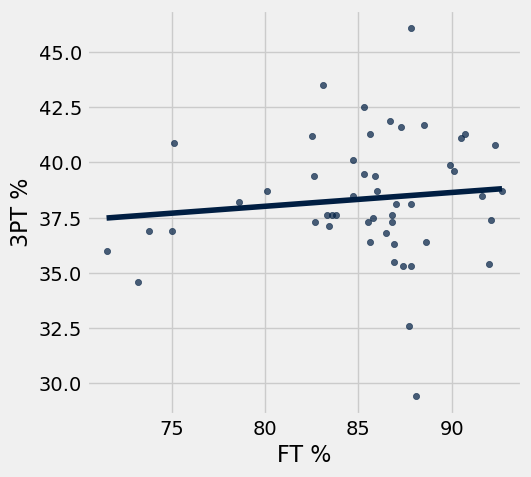

In [11]:
shots.scatter('FT %', '3PT %', fit_line=True) #SOLUTION

**Question 1.4.** By examining the scatter plot provided, with free throw percentages (FT %)  on the horizontal axis and three point (3PT %) on the vertical axis, estimate the correlation coefficient r. Does r appear to be closest to 0, 0.5, or -0.5? Justify your answer with an explanation based on the trend observed in the plot.

 **(5 points)**


**SOLUTION:** Based on the plot, r appers closest to 0. There is a slight positive association reflected by the upward sloping graph, but the data points are widely dispersed from the line, indicating a weak linear association between free perecentage and three point percentage.

**Question 1.5.** In order to understand the relationship between two basketball statistics, such as free throw percentages (FT%) and three-point percentages (3PT %), it's useful to calculate key regression statistics that summarize this relationship.

Develop a function named `compute_regression_stats` that takes in the argument `tbl`, a data table with two columns. The first column is the x-axis (the explanatory variable), and the second column is the y-axis (the response variable). The function should return an array with three elements: **(1) The correlation coefficient** of the two columns, and the **(2) slope** and **(3) intercept** of the regression line that predicts the second column from the first, in original units. **(5 points)**

*Hint:* This is a rare occasion where it’s better to implement the function using column indices instead of column names, in order to be able to call this function on any table. If you need a reminder about how to use column indices to pull out individual columns, please refer to [this](https://www.inferentialthinking.com/chapters/06/Tables.html#accessing-the-data-in-a-column) section of the textbook.

In [12]:
def compute_regression_stats(tbl):
    # BEGIN SOLUTION
    y_mean = np.mean(tbl.column(1)) 
    y_sd = np.std(tbl.column(1))
    x_mean = np.mean(tbl.column(0))
    x_sd = np.std(tbl.column(0))
    r = correlation(tbl.column(0), tbl.column(1))
    slope = r * (y_sd / x_sd)
    intercept = slope * (-x_mean) + y_mean 
    # END SOLUTION
    return make_array(r, slope, intercept)

constraints = compute_regression_stats(shots) 
print('r:', constraints.item(0), '; slope:', constraints.item(1), '; intercept:', constraints.item(2))

r: 0.11003088267167974 ; slope: 0.06260718760951046 ; intercept: 33.00485218065394


In [13]:
len(constraints) == 3

True

In [14]:
# Make sure your function is returning an array!
type(constraints) == np.ndarray

True

In [15]:
np.isclose(constraints.item(0), 0.11003088267167993)

True

In [16]:
# HIDDEN
np.allclose(constraints, [0.11003088267167974 , 0.06260718760951046, 33.00485218065394])

True

**Question 1.6.**: Now suppose you want to go the other way and predict a free throw percentage (FT %) given a three-point percentage (3PT %). Now 3PT % becomes the explanatory variable used to predict FT % the new response variable. How would various regression statistics be affected? Set `regression_change` equal to an array that includes the numbers of the correct answer choices below. **(5 points)**

1) The correlation coefficient will remain unchanged because it only measures the strength and direction of the *linear* relationship between the two variables, regardless of which is the predictor.

2) The value of the slope will remain the same because it only reflects the rate of change between the two variables.

3) The value of the intercept may change because it is calculated based on the distribution and scale of the predictor variable.

4) The units of the slope will not change because the units of the predictor and response variables are independent of each other.

In [17]:
regression_change = make_array(1, 3) # SOLUTION
regression_change

array([1, 3])

In [18]:
# Make sure regression_change is a numpy array with 3 items!
len(regression_change) == 2 and type(regression_change) == np.ndarray

True

In [19]:
regression_change.item(0) in set([0, 1, False, True])

True

In [20]:
# HIDDEN
np.all(regression_change == make_array(1, 3))

True

**Question 1.7.** Let's use `compute_regression_stats` (from Question 1.5) to predict what certain NBA Players' three point percentage (3PT %) would be given their Free Throw percentage (FT %). **(5 points)**

The NBA player with the highest free throw percentage (FT %) is Klay Thompson with 92.7%. What is the prediction for Thompson's three point perecentage (3PT %) using this line?



In [21]:
free_throw_3pt_est = constraints.item(1) * 92.7 + constraints.item(2) # SOLUTION
print("Predicted free throw percentage: {:.1f}%".format(np.round(free_throw_3pt_est, 1)))

Predicted free throw percentage: 38.8%


In [22]:
35 <= free_throw_3pt_est <= 45

True

In [23]:
# HIDDEN
np.isclose(free_throw_3pt_est, 38.80853847205556)

True

**Question 1.8.** Is it reliable to use this line to predict three point percentage (3PT %) of players? **(5 points)**

*Hint:* Compare Thompson' three point percentage (3PT %)  to the three point percentage in `shots`. Is it relatively similar to the rest of the data (shown in Question 1.3)? 


**SOLUTION:** You wouldn't expect the regression line to be reliabe since the r-value is fairly close to 0 indicating a weak linear association. However Klay's percentage is 38.7 which is close to 38.8. The range of 3-point percentages is quite small and it seems most are above 30% indicating strong 3-point shooters.

## 2. Smartphone Sales

Imagine you're a business analyst in December 2020. Smartphones are essential consumer goods, heavily influencing both technological trends and consumer behavior, and you want to understand the dynamics between competing models!

The two most popular smartphone models are Apple's iPhone 12 and Samsung's Galaxy S20. Each model has daily sales figures, reflecting its market demand. For example, on the first day of sales in 2020, the iPhone 12 sold 1,060 units, and the Galaxy S20 sold 991 units.

**You want to predict the sales of the Galaxy S20 on any given day based on the sales figures of the iPhone 12.** Below, we load a table called `iphone_vs_galaxy`. This table has 3 columns:
* `Date`, the date
* `iPhone Sales`,  the number of iPhone 12 units sold on that day,
* `Galaxy Sales`,  the number of Galaxy S20 units sold on that day,
* `Day`, the number of days since the start of our data

In [24]:
iphone_vs_galaxy = Table.read_table('iPhone_vs_Galaxy_Sales.csv')
iphone_vs_galaxy.show(20)

Date,iPhone Sales,Galaxy Sales,Day
1/1/20,1060,991,1
1/2/20,978,937.5,2
1/3/20,1067,983.5,3
1/4/20,1167,988,4
1/5/20,951,917.5,5
1/6/20,946,936.5,6
1/7/20,1159,1088.5,7
1/8/20,1057,1010.5,8
1/9/20,904,991.5,9
1/10/20,1020,901.5,10


**Question 2.1.** In the cell below, create an overlaid scatter plot that visualizes the iPhones sales and Galaxy sales as a function of the day. Both iPhone and Galaxy sales should be plotted on the same graph. **(5 points)**

*Hint*: [Section 7.3](https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html#overlaid-line-plots) in the textbook might be helpful!

*Note:* Think about how comparable iPhone 12 and Galaxy S20 sales are.


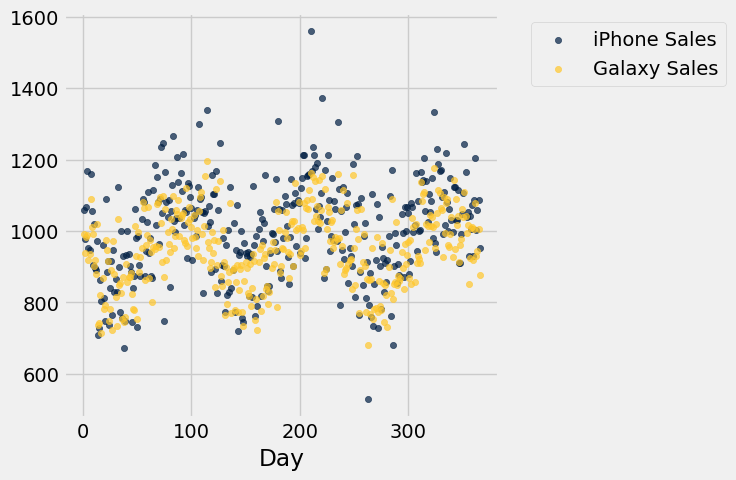

In [25]:
# BEGIN SOLUTION NO PROMPT
iphone_galaxy_sales = iphone_vs_galaxy.select("Day","iPhone Sales", "Galaxy Sales" )
iphone_galaxy_plot = iphone_galaxy_sales.scatter("Day")

# END SOLUTION
""" # BEGIN PROMPT
# Create a scatter plot of iPhone Sales and Galaxy Sales as a function of time
...
"""; # END PROMPT

**Question 2.2.** Now, calculate the correlation coefficient between the sales of Apple iPhone 12 and Galaxy S20 using the `correlation` function you defined earlier. **(5 points)**


In [26]:
r = correlation(iphone_vs_galaxy.column('Galaxy Sales'), iphone_vs_galaxy.column('iPhone Sales')) #SOLUTION
r

0.84201087183279122

In [27]:
# Correlation is a number between -1 and 1
-1 <= r <= 1

True

In [28]:
# It appears that you implemented std_units, but did so incorrectly
std_units(np.arange(5)) is None or np.allclose(std_units(np.arange(5)), [-1.41421356, -0.70710678,  0,  0.70710678,  1.41421356])

True

In [29]:
# HIDDEN
np.isclose(r, 0.84201087183279122)

True

**Question 2.3.** Write a function `galaxy_sales_predictor` which takes daily sales figures for the iPhone 12 and predicts the daily sales of the Galaxy S20. Use the function `compute_regression_stats` that you defined earlier in this homework to assist in this process. **(5 points)**

*Hint*: Double-check what the `tbl` input to `compute_regression_stats` must look like!

*Note*: Ensure that your `galaxy_sales_predictor` function is using least squares linear regression to make predictions.



In [30]:
def galaxy_sales_predictor(iPhone_sales):
    parameters = compute_regression_stats(iphone_vs_galaxy.select("iPhone Sales", "Galaxy Sales" )) #SOLUTION
    slope = parameters.item(1) #SOLUTION
    intercept = parameters.item(2) #SOLUTION
    return slope * iPhone_sales + intercept #SOLUTION

In [31]:
galaxy_sales_predictor(np.arange(10,15))

array([ 308.08464403,  308.73092002,  309.37719601,  310.02347201,
        310.669748  ])

In [32]:
0 < galaxy_sales_predictor(10) < 400

True

In [33]:
# HIDDEN
np.allclose(galaxy_sales_predictor(np.arange(10,15)), [ 308.08464403 ,  308.73092002,  309.37719601,  310.02347201,  310.669748 ])

True

**Question 2.4.** Now, using the `galaxy_sales_predictor` function you just defined, make a scatter plot with iPhone 12 sales along the x-axis and both actual and predicted Galaxy S20 sales along the y-axis. The color of the dots for the actual Galaxy S20 sales should be different from the color for the predicted Galaxy S20 sales. **(5 points)**

*Hint 1:* An example of such a scatter plot is generated can be found [here](https://inferentialthinking.com/chapters/15/2/Regression_Line.html). </a>

*Hint 2*: Think about the table that must be produced and used to generate this scatter plot. The table should include columns for iPhone 12 sales, actual Galaxy S20 sales, and predicted Galaxy S20 sales. Each row in the table should represent a day’s data. Constructing the table will be the main part of this question; once you have this table, generating the scatter plot should be straightforward as usual.


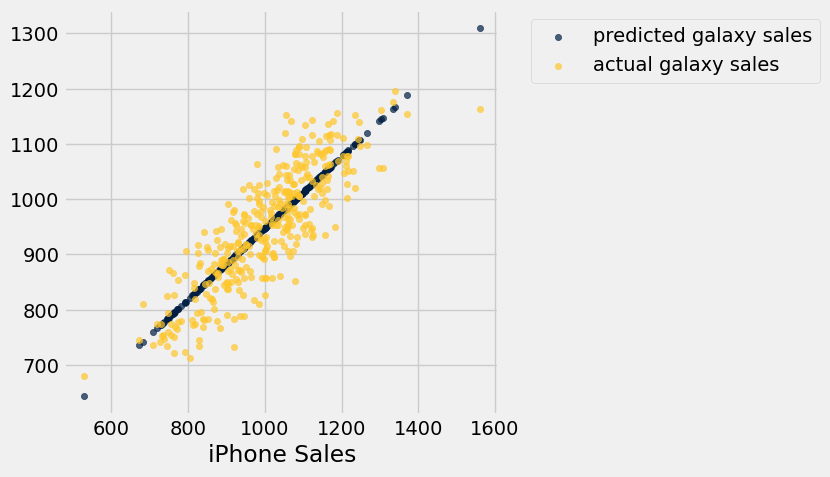

In [34]:
iPhone_sales = iphone_vs_galaxy.select('iPhone Sales') # SOLUTION
galaxy_pred = iPhone_sales.with_column("predicted galaxy sales", iphone_vs_galaxy.apply(galaxy_sales_predictor, "iPhone Sales")) # SOLUTION
galaxy_pred_actual = galaxy_pred.with_column("actual galaxy sales", iphone_vs_galaxy.column("Galaxy Sales")) # SOLUTION
galaxy_pred_actual.scatter('iPhone Sales') # SOLUTION

**Question 2.5.** Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable? **(5 points)**


**SOLUTION:** The model is reasonable for this particular data, as the data points are heavily clustered around the prediction line, indicated a strong linear association. 

## 3. Evaluating NFL Game Predictions

#### A Brief Introduction to Sports Betting

In an NFL game, similar to basketball, the team playing at its home stadium is known as the "home team", while the team visiting the stadium is the "away team". Each team competes to score points through touchdowns, field goals, and safeties, and at the end of the game, the team with the greater number of points is declared the winner.

The difference in score can be expressed through what is known as the **outcome**, which is calculated by **subtracting the home team's score from the away team's score**:



$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won. If the number is negative, the home team won the game.

In order to facilitate betting on games, analysts at casinos try to predict the outcome of the game. This prediction of the outcome is called the **spread.** The **spread** is a forecast of the number of points by which a stronger team is expected to defeat a weaker one.

In [62]:
nfl_spreads = Table.read_table("NFL Spread2.csv")
nfl_spreads.show(20)

Date,Home Team,Away Team,Home Score,Away Score,Outcome,Spread
1/14/68,GB,LVR,33,14,-19,-13.5
1/12/69,IND,NYJ,7,16,9,-18
1/11/70,KC,MIN,23,7,-16,-12
1/17/71,IND,DAL,16,13,-3,-2.5
1/16/72,DAL,MIA,24,3,-21,-6
1/14/73,MIA,WAS,14,7,-7,-1
1/13/74,MIA,MIN,24,7,-17,-6.5
1/12/75,MIN,PIT,6,16,10,-3
1/18/76,DAL,PIT,17,21,4,-7
1/9/77,MIN,LVR,14,32,18,-4


Here's a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis.

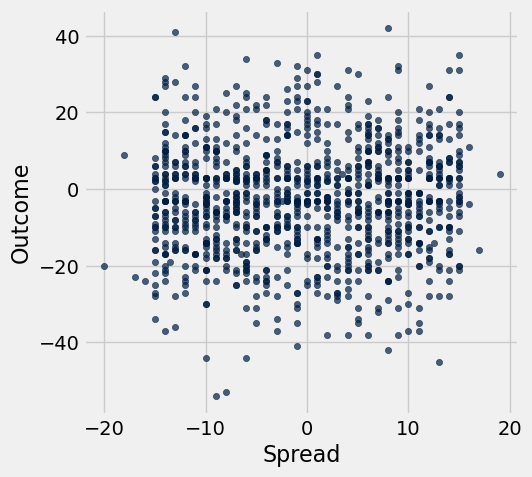

In [63]:
nfl_spreads.scatter("Spread", "Outcome")

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games assigned that spread equal to the spread? If not, the casino would apparently be making a systematic error in its predictions.

**Question 3.1.** Compute the correlation coefficient between outcomes and spreads. **(5 points)**

*Note:* It might be helpful to use the `correlation` function.


In [64]:
nfl_spread_r = correlation(nfl_spreads.column("Outcome"), nfl_spreads.column("Spread")) #SOLUTION
nfl_spread_r

0.04123242222778848

In [65]:
-1 <= nfl_spread_r <= 1

True

In [66]:
# HIDDEN
np.isclose(nfl_spread_r, 0.04123242222778848)

True

**Question 3.2.** Among games with a spread between .5 and 3.5 (including both .5 and 3.5), what was the average outcome? **(5 points)**


In [67]:
nfl_spreads_around_2 = nfl_spreads.where("Spread", are.between_or_equal_to(.5, 3.5)) #SOLUTION
nfl_spread_2_outcome_average = np.mean(nfl_spreads_around_2.column("Outcome")) #SOLUTION
print("Average outcome for spreads around 2:", nfl_spread_2_outcome_average)

Average outcome for spreads around 2: -3.48958333333


In [68]:
-4 <= nfl_spread_2_outcome_average <= nfl_spread_2_outcome_average

True

In [69]:
# HIDDEN
np.isclose(nfl_spread_2_outcome_average, -3.48958333333)

True

**Question 3.3.** Using the `compute_regression_stats` function that you defined earlier, compute the least squares linear regression line for predicting the actual game outcomes from the provided betting spreads. We have prepared a dataset for you, structured in a two-column format; the first column is labeled `Spread` (predictor variable, x), and the second column is labeled `Outcome` (response variable, y). Use this dataset as an argument to your function to carry out the regression analysis. **(5 points)**



In [70]:
evaluate_table = nfl_spreads.select('Spread', 'Outcome')
approximate = compute_regression_stats(evaluate_table) # SOLUTION
nfl_spread_slope = approximate.item(1) # SOLUTION
nfl_spread_intercept = approximate.item(2) # SOLUTION
print("Slope:", round(nfl_spread_slope, 3))
print("Intercept", round(nfl_spread_intercept, 3))

Slope: 0.066
Intercept -2.753


In [71]:
-1 <= nfl_spread_slope < .6

True

In [72]:
# HIDDEN
np.isclose(nfl_spread_slope, 0.06630266535812503)

True

In [73]:
# HIDDEN
np.isclose(nfl_spread_intercept, -2.7531093171024974)

True

**Question 3.4.** 
Do you think this regression line will provide casino analysts with a reliable prediction of game outcomes? Provide a rationale for your answer. Include a discussion of the correlation coefficient and the scatter plot in your answer. **(5 points)**


**SOLUTION:** No. The correlation coefficient is very close to 0 indicating no linear correlation between spreads and outcomes, and the widely dispersed data points on the scatter plot which do not follow a linar pattern, support this conclusion.

### Fitting a Least-Squares Regression Line

Recall that the least-squares regression line is the unique straight line that minimizes root mean squared error (RMSE) among all possible fit lines. Using this property, we can find the equation of the regression line by finding the pair of slope and intercept values that minimize root mean squared error. 

**Question 3.5.** Define a function called `errors`.  It should take three arguments:
1. a table `table` like `spreads` (with the same column names and meanings, but not necessarily the same data)
2. the `slope` of a line (a number)
3. the `intercept` of a line (a number).

It should **return an array of the errors** made when a line with that slope and intercept is used to predict outcome from spread for each game in the given table. **(3 points)**

*Note*: Make sure you are returning an array of the errors, and not the RMSE. 


In [74]:
def errors(table, slope, intercept):
    predictions = slope * table.column("Spread") + intercept # SOLUTION NO PROMPT
    return table.column("Outcome") - predictions # SOLUTION

In [75]:
type(errors(nfl_spreads, 0, 0).item(0)) in set([float, np.float32, np.float64])

True

In [76]:
len(errors(nfl_spreads, 0, 0)) == 1083

True

In [77]:
# HIDDEN
np.isclose(np.mean(errors(nfl_spreads, 0, 0)), -2.7728531855955678)

True

**Question 3.6.** Using `errors`, compute the errors for the line with slope `2` and intercept `35` on the `spreads` dataset. Name that array `outcome_errors`.  Then, make a scatter plot of the errors. **(3 points)**

*Hint:* To make a scatter plot of the errors, plot the error for each outcome in the dataset.  Put the actual spread on the horizontal axis and the outcome error on the vertical axis.


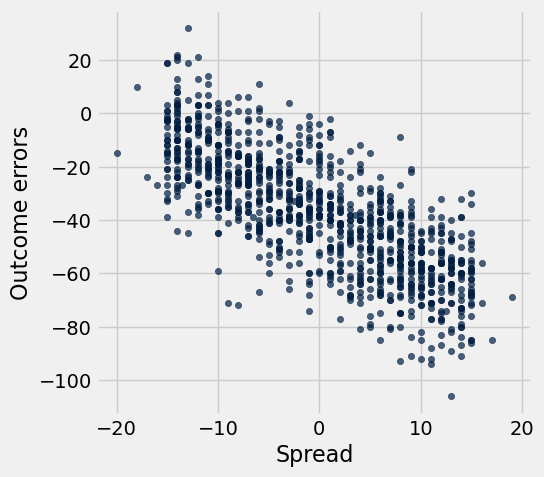

In [78]:
outcome_errors = errors(nfl_spreads, 2, 35) # SOLUTION
# BEGIN SOLUTION
nfl_spreads.with_column("Outcome errors", outcome_errors)\
           .scatter("Spread", "Outcome errors")
# END SOLUTION

In [79]:
# If you're not passing this test, double check your errors function!
np.round(outcome_errors.item(0), 2) == -27.0

True

You should find that the errors are almost all negative.  That means our line is not the best fit to our data.  Let's find a better one.

**Question 3.7.** Define a function called `fit_line`.  It should take a table like `nfl_spreads` (with the same column names and meanings) as its argument.  It should return an array containing the slope (as the first element) and intercept (as the second element) of the least-squares regression line predicting outcome from spread for that table. **(3 points)**

*Hint*: Define a function `rmse` within `fit_line` that takes a slope and intercept as its arguments. `rmse` will use the table passed into `fit_line` to compute predicted outcomes and then return the root mean squared error between the predicted and actual outcomes. Within `fit_line`, you can call `rmse` the way you would any other function.

If you haven't tried to use the `minimize` [function](http://data8.org/sp22/python-reference.html) yet, now is a great time to practice. Here's an [example from the textbook](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).


In [80]:
# BEGIN SOLUTION NO PROMPT
def fit_line(tbl):
    def rmse(slope, intercept):
        return (np.mean(errors(tbl, slope, intercept)**2)**0.5)
    return minimize(rmse)
# END SOLUTION
""" # BEGIN PROMPT
def fit_line(tbl):
    # Your code may need more than 1 line below here.
    def rmse(..., ...):
        return ... 
    return ... 
"""; # END PROMPT
    
# Here is an example call to your function.  To test your function,
# figure out the right slope and intercept by hand.
example_table = Table().with_columns(
    "Spread", make_array(0, 1),
    "Outcome", make_array(1, 3))
fit_line(example_table)

array([ 2.,  1.])

In [81]:
type(fit_line(example_table)) == np.ndarray

True

In [82]:
type(fit_line(example_table).item(0)) in set([float, np.float32, np.float64])

True

In [83]:
# HIDDEN
np.isclose(fit_line(example_table).item(0), 2) and np.isclose(fit_line(example_table).item(1), 1)

True

**Question 3.8.** Use `fit_line` to fit a line to `spreads`, and assign the output to `regression_line`. Assign the first and second elements in `regression_line` to `regression_line_slope` and `regression_line_intercept`, respectively.

Then, set `new_errors` to the array of errors that we get by calling `errors` with our new regression line. The provided code will graph the corresponding residual plot with a best fit line. **(3 points)**

*Hint:* Make sure that the residual plot makes sense. What qualities should the best fit line of a residual plot have?


'Slope: 0.0663584 | Intercept: -2.75309'

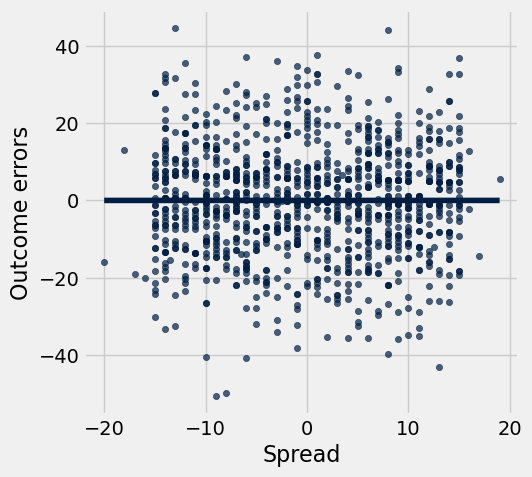

In [84]:
regression_line = fit_line(nfl_spreads) #SOLUTION
regression_line_slope = regression_line.item(0) #SOLUTION
regression_line_intercept = regression_line.item(1) #SOLUTION

new_errors = errors(nfl_spreads, regression_line_slope, regression_line_intercept) #SOLUTION

# This code displays the residual plot, given your values for the regression_line_slope and regression_line_intercept
Table().with_columns("Spread", 
                    nfl_spreads.column("Spread"), 
                    "Outcome errors", 
                    new_errors
                   ).scatter("Spread", "Outcome errors", fit_line=True)

# This just prints your slope and intercept
"Slope: {:g} | Intercept: {:g}".format(regression_line_slope, regression_line_intercept)

In [85]:
len(new_errors) == 1083

True

In [86]:
# HIDDEN
int(round(regression_line_slope, 1)) == 0

True

In [87]:
# HIDDEN
round(regression_line_intercept, 1) == -2.8

True

In [88]:
# HIDDEN
round(new_errors[10], 1) == -13.8

True

**Question 3.9.** How does the process of minimizing the Root Mean Square Error (RMSE) lead to slope and intercept values in Question 3.8 that are consistent with those obtained using previous methods in Question 3.3, even though different techniques are employed? **(3 points)**


**SOLUTION:** Minimizing the Root Mean Square Error (RMSE) essentially involves finding the line that best fits the data by minimizing the differences between the observed values and the values predicted by the regression line. While the techniques for finding the regression line in Question 3.3 may differ, the ultimate goal remains the same: to minimize the overall error. Therefore, even though different methods may be employed, the fundamental principle of minimizing the differences between observed and predicted values leads to slope and intercept values that align closely with those obtained using previous methods.

You're done with Homework 10!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**